# GRADIENT BOOSTING CLASSIFIER ALGORITHEM

In [1]:
# Import required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file
df = pd.read_csv('KIDNEY.csv')
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [3]:
# Drop Missing values
df=df.dropna()

In [4]:
# Display last five rows in the table
df.tail()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0.0,0
399,80.0,1.025,0.0,0.0,1.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0.0,0


In [5]:
# split the dataset into dependent and independent variables
x1 = df.drop(labels='Class', axis=1)
y1 = df.loc[:,'Class']

In [6]:
# Check for imbalanced dataset
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 250, 0: 150})
OVER SAMPLING DATA COUNT  :  Counter({1: 250, 0: 250})


In [7]:
# Specific grouping for testing and training dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  400
NUMBER OF TEST DATASET      :  100
TOTAL NUMBER OF DATASET    :  500


In [8]:
# Display the dataset after seperation
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  400
NUMBER OF TEST DATASET      :  100
TOTAL NUMBER OF DATASET    :  500


In [9]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
# Fit the datasets for prediction
GRB = GradientBoostingClassifier(random_state=42)
GRB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [11]:
# Prediction for the datasets
predicted = GRB.predict(x_test)

In [12]:
# Predict confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:


 [[50  0]
 [ 1 49]]


In [13]:
# make valdation for accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(GRB, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [ 99. 100. 100.  99. 100.]


In [14]:
# Accuracy score for model prediction
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF GRADIENT BOOSTING CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF GRADIENT BOOSTING CLASSIFIER IS : 99.0


In [15]:
# Loss based on model prediction
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF GRADIENT BOOSTING CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF GRADIENT BOOSTING CLASSIFIER IS : 1.0


In [16]:

from sklearn.metrics import classification_report
P = classification_report(y_test,predicted)
print("THE PRECISION SCORE OF GRADIENT BOOSTING CLASSIFIER IS\n\n\n:",P*100)

THE PRECISION SCORE OF GRADIENT BOOSTING CLASSIFIER IS


:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg     

THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:


[[50  0]
 [ 1 49]]


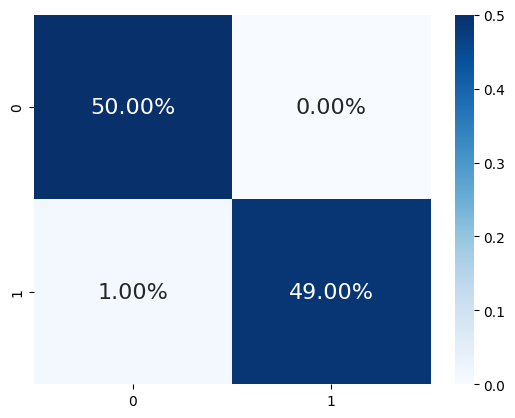

In [17]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF GRADIENT BOOSTING CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

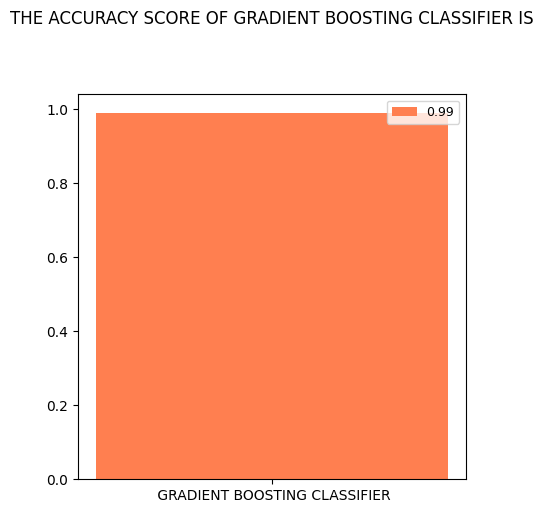

In [18]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg=" GRADIENT BOOSTING CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("coral"))
    plt.title("THE ACCURACY SCORE OF GRADIENT BOOSTING CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [19]:
import joblib
joblib.dump(GRB, 'KIDNEY.pkl')

['KIDNEY.pkl']